In [2]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean, median
plt.rcParams['figure.figsize'] = (25, 10)
import matplotlib.patches as mpatches
import numpy as np
import numpy.fft

2.6010513030343474


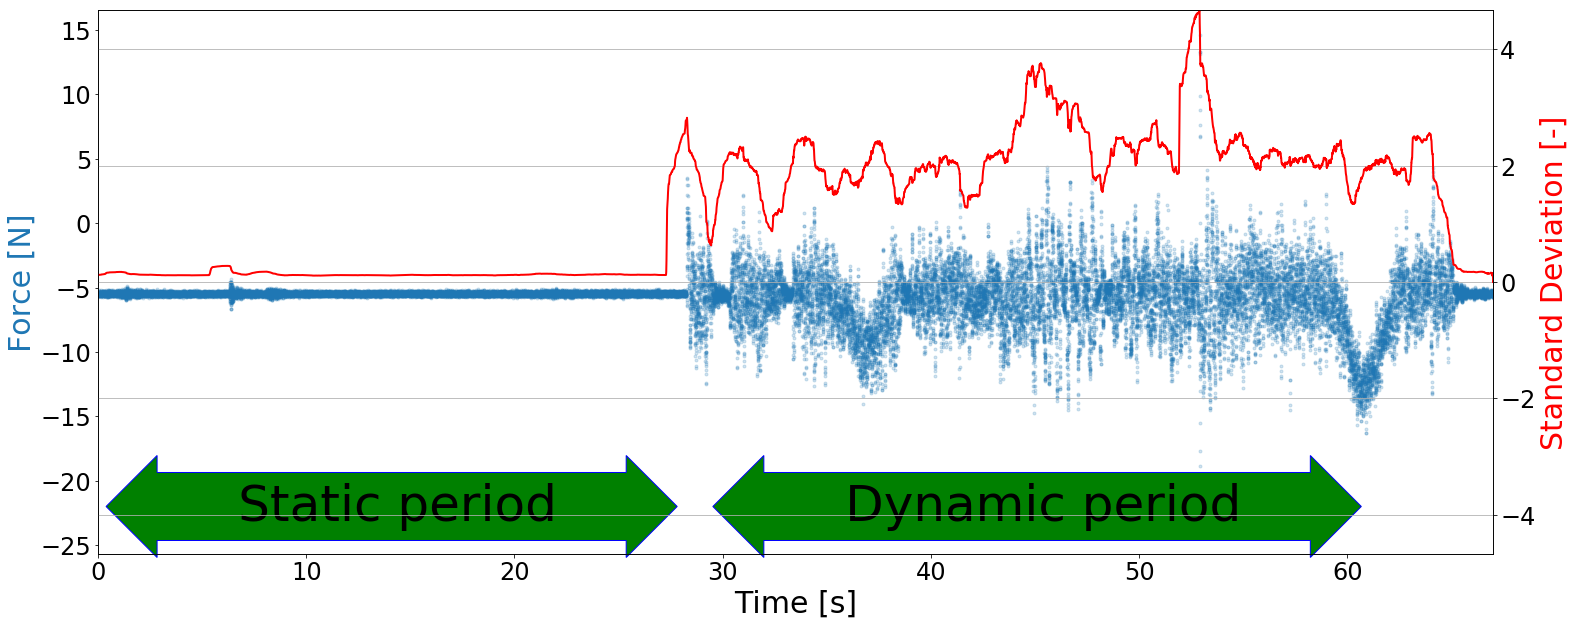

In [3]:
ft = genfromtxt('thesis_dynamic_calib.csv', delimiter=';')
y = ft[:,0]
n = len(y)
t = np.linspace(0,n/600,n)

fig, ax1 = plt.subplots()

line = ax1.scatter(t,y,marker='.',alpha=0.2)
ax1.set_xlabel('Time [s]', size=30)
ax1.set_ylabel('Force [N]', size=30,color='#1f77b4')
ax1.set_xlim([min(t[:]),max(t[:])])
ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)

std = []
for i in range(len(ft)):
    std.append(np.std(ft[i:(i+600),0]))
ax2 = ax1.twinx()
ax2.plot(t,std,color ="r",linewidth=2)
ax2.set_ylim([-max(std),max(std)])
ax2.set_ylabel('Standard Deviation [-]', size=30,color='red')
ax2.tick_params(axis = 'both', which = 'major', labelsize = 24)

print(np.std(ft[600*30:,0]))

bbox_props = dict(boxstyle="darrow,pad=0.2", fc="green", ec="b", lw=1)
t = ax1.text(14, -22, "      Static period     ", ha="center", va="center", rotation=0,
            size=50,
            bbox=bbox_props)

bbox_props = dict(boxstyle="darrow,pad=0.2", fc="green", ec="b", lw=1)
t = ax1.text(45, -22, "      Dynamic period     ", ha="center", va="center", rotation=0,
            size=50,
            bbox=bbox_props)


plt.grid()

#plt.ylim([min(y)-.5,max(y)+0.5])
plt.savefig('/home/robotronics/Pictures/noisy_calib.png', format='png', dpi=100)


1.998124388482014

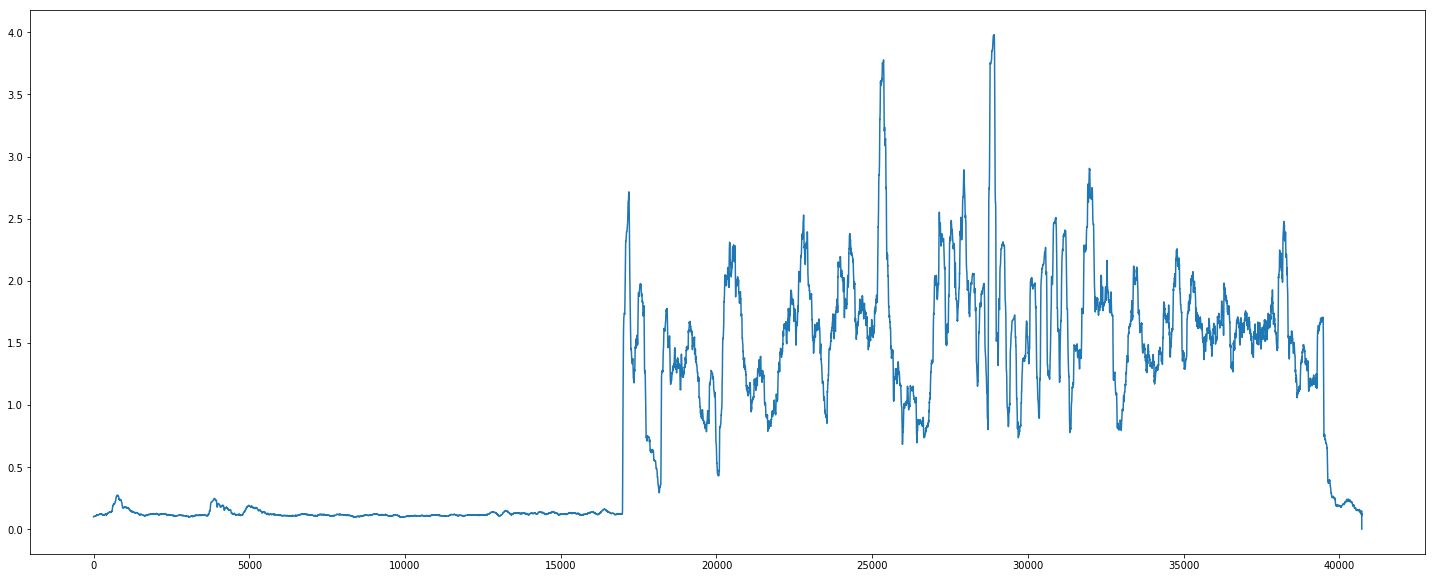

In [4]:
std = []
for i in range(len(ft)):
    std.append(np.std(ft[i:(i+200),1]))
plt.plot(std)
np.std(ft[:,0])

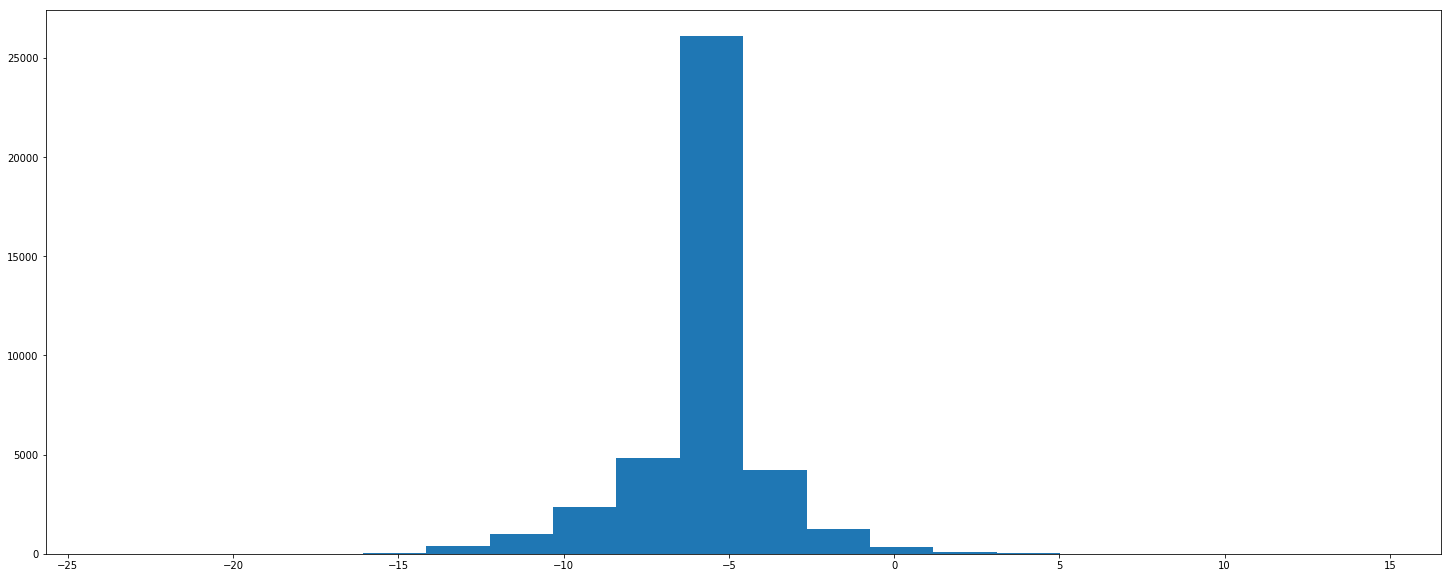

In [5]:
plt.subplot
plt.hist(ft[:,0], bins=20)
plt.show()

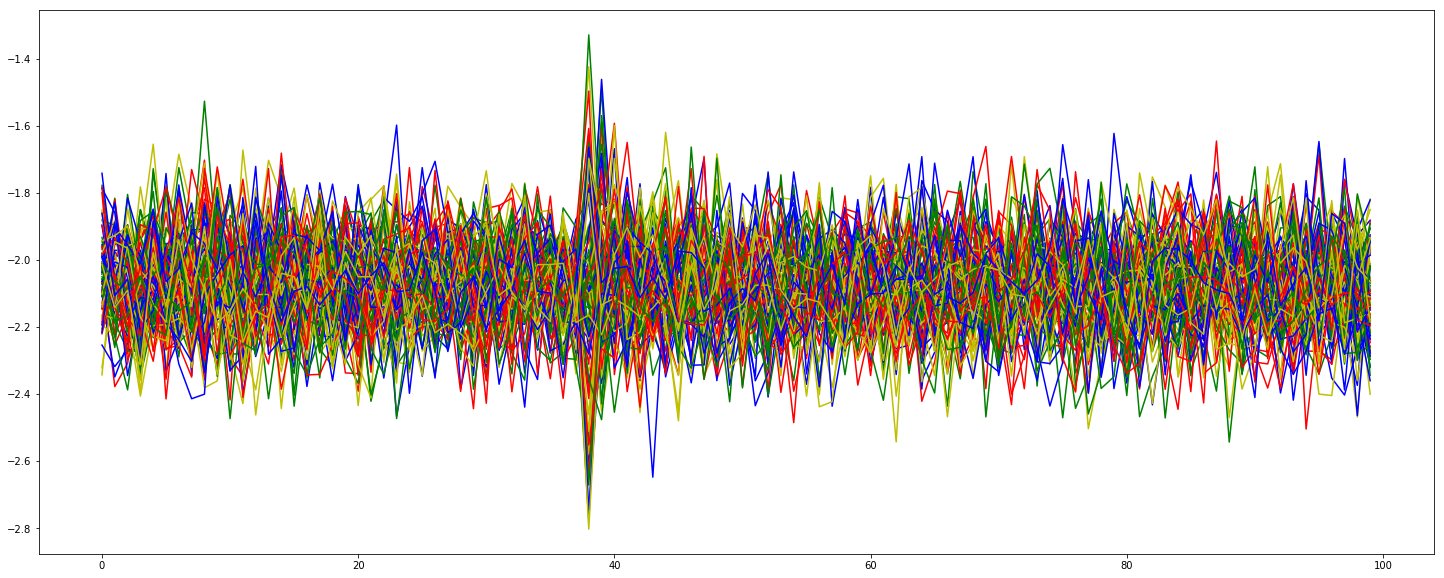

In [7]:
import matplotlib.style
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['axes.prop_cycle'] = cycler(color= ['r', 'g', 'b', 'y'])
means = []
for i in range(100):
    means.append(ft[i*100:(i+1)*100,2])
plt.plot(means)
plt.show()

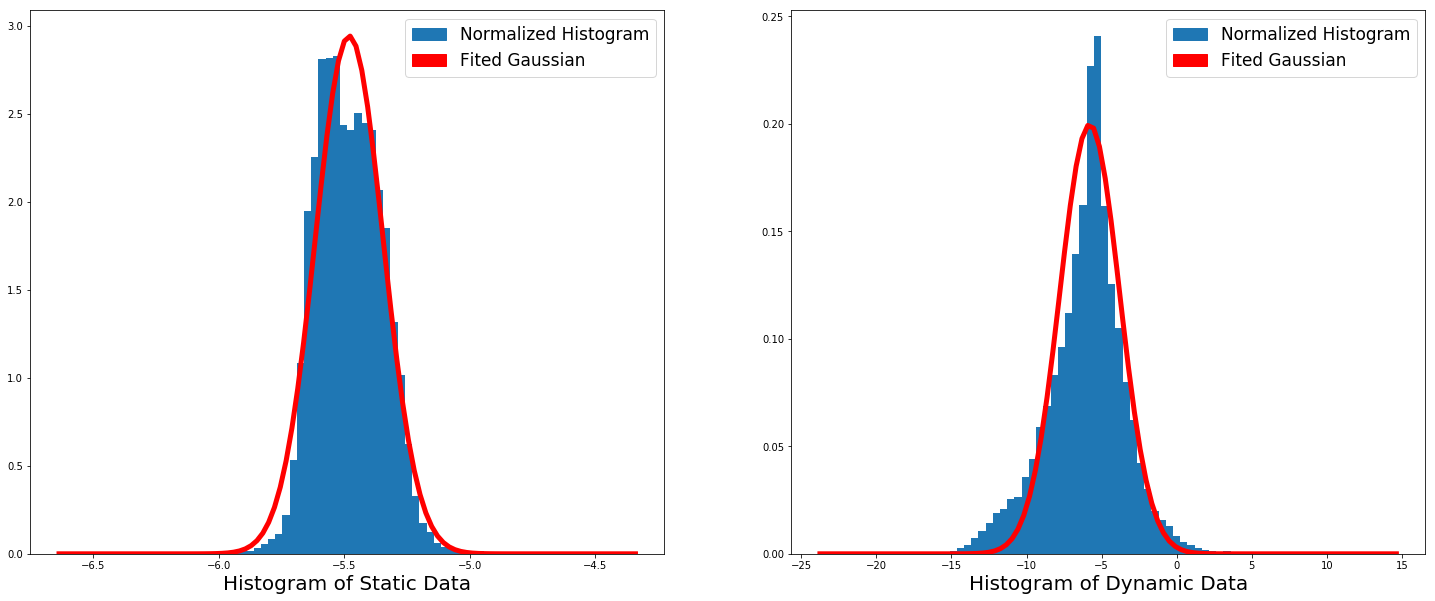

In [10]:
import matplotlib.patches as mpatches
f, (ax1, ax2) = plt.subplots(1, 2)

blue_patch = mpatches.Patch(color='#1f77b4', label='Normalized Histogram')
red_patch = mpatches.Patch(color='red', label='Fited Gaussian')

data = ft[:600*25,0]
avg = np.mean(data)
var = np.var(data)
# From that, we know the shape of the fitted Gaussian.
pdf_x = np.linspace(np.min(data),np.max(data),100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)
ax1.hist(ft[:600*25,0], bins=80,normed=True,color='#1f77b4')
ax1.plot(pdf_x,pdf_y,color="red",linewidth=5)
ax1.set_xlabel("Histogram of Static Data", size=20)
ax1.legend(handles=[blue_patch,red_patch], prop={'size': 17})


data = ft[:,0]
avg = np.mean(data)
var = np.var(data)
# From that, we know the shape of the fitted Gaussian.
pdf_x = np.linspace(np.min(data),np.max(data),100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)
ax2.hist(ft[600*30:,0], bins=80,normed=True,color='#1f77b4')
ax2.plot(pdf_x,pdf_y,color="red",linewidth=5)
ax2.set_xlabel("Histogram of Dynamic Data", size=20)
ax2.legend(handles=[blue_patch,red_patch], prop={'size': 17})
plt.savefig('/home/robotronics/Pictures/noisy_histogram.png', format='png', dpi=100)


In [11]:
print(np.round(np.std(ft[:20*600],axis=0),4))
print(np.round(np.std(ft[30*600:55*600],axis=0),4))

[0.1374 0.1283 0.1344 0.0065 0.0074 0.0015]
[2.4862 2.4726 2.5888 0.191  0.2184 0.0342]
